In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

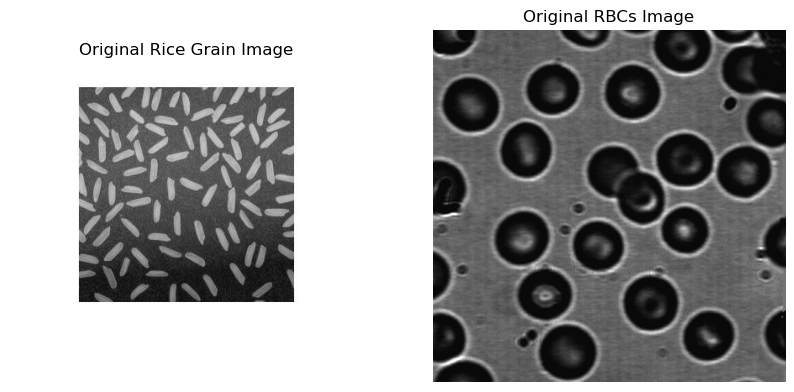

In [2]:
# Reading the images
rbcs = cv.imread('./Filtering/RBCs.bmp', cv.IMREAD_GRAYSCALE)
ricegrains = cv.imread('./Filtering/ricegrains.jpg', cv.IMREAD_GRAYSCALE)

# Plotting the images
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(ricegrains, cmap='gray')
plt.title('Original Rice Grain Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(rbcs, cmap='gray')
plt.title('Original RBCs Image')
plt.axis('off')
plt.show()

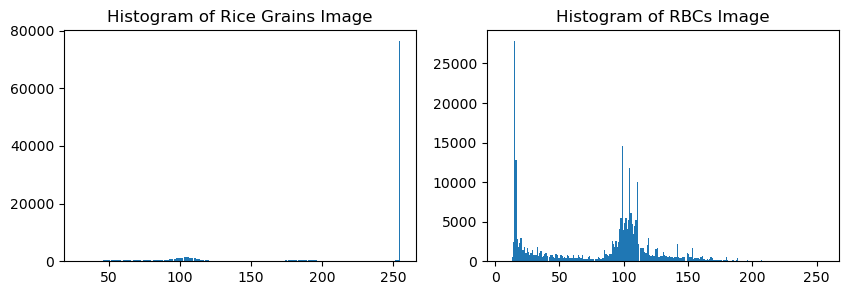

In [3]:
# Plotting histogram
plt.figure(figsize=(10, 3))
plt.subplot(121)
plt.hist(ricegrains.ravel(), bins=256)
plt.title('Histogram of Rice Grains Image')
plt.subplot(122)
plt.hist(rbcs.ravel(), bins=256)
plt.title('Histogram of RBCs Image')
plt.show()

From the image and histogram it is clear that ricegrain image has two background color, outer background is completely white and inner background is black. Hence intensity slicing would work better for binarization of the image.

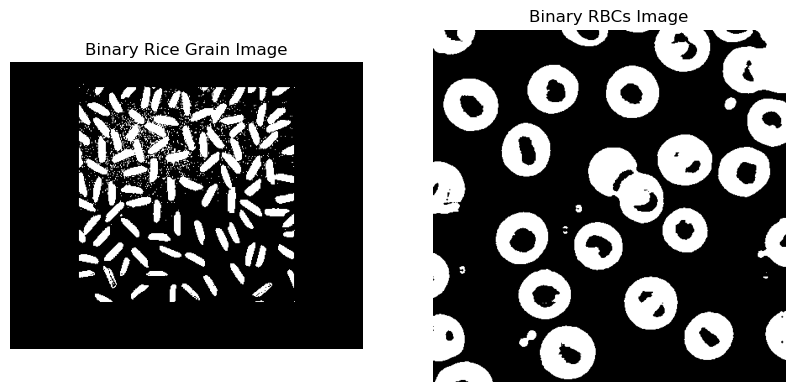

In [4]:
# Thresholding the RBC image
_, binary_rbcs = cv.threshold(rbcs, 50, 255, cv.THRESH_BINARY_INV)

# Apply intensity slicing on the rice grain image
binary_ricegrain = np.zeros_like(ricegrains)
binary_ricegrain[(ricegrains > 115) & (ricegrains < 240)] = 255

# Plotting the binary images
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(binary_ricegrain, cmap='gray')
plt.title('Binary Rice Grain Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(binary_rbcs, cmap='gray')
plt.title('Binary RBCs Image')
plt.axis('off')
plt.show()

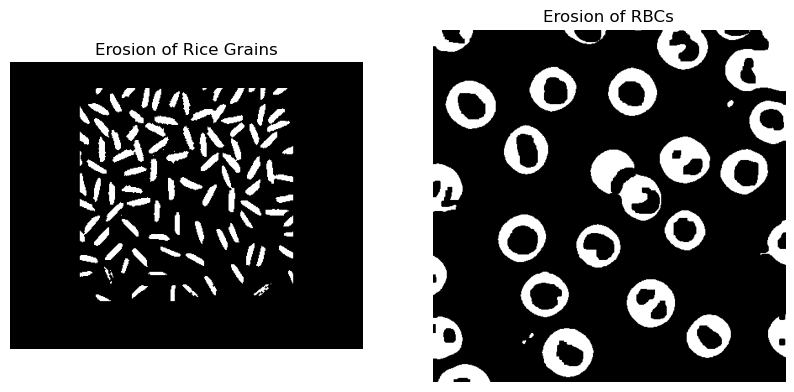

In [5]:
# Morohological erosion kernels
kernel_rice = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3, 3))
kernel_rbc = np.ones((7, 7), np.uint8)

# Applying erosion
erosion_ricegrain = cv.erode(binary_ricegrain, kernel_rice, iterations=1)
erosion_rbcs = cv.erode(binary_rbcs, kernel_rbc, iterations=1)

plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(erosion_ricegrain, cmap='gray')
plt.title('Erosion of Rice Grains')
plt.axis('off')

plt.subplot(122)
plt.imshow(erosion_rbcs, cmap='gray')
plt.title('Erosion of RBCs')
plt.axis('off')
plt.show()

Erosion is able to separate two RBCs cells in the middle of the image which were overlapping. But erosion is not able to separate all objects.

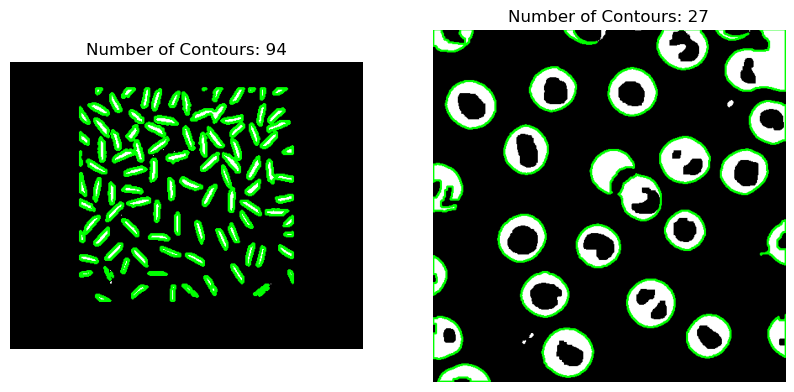

In [6]:
# Find contours and count the number of objects which has area greater than 2 in rice grain image
contours_ricegrain, _ = cv.findContours(erosion_ricegrain, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours_ricegrain = [cnt for cnt in contours_ricegrain if cv.contourArea(cnt) > 2]

image_ricegrains = cv.cvtColor(erosion_ricegrain, cv.COLOR_GRAY2BGR)
cv.drawContours(image_ricegrains, contours_ricegrain, -1, (0, 255, 0), 2)

# Find contours and count the number of objects which has area greater than 200 in RBCs image
contours_rbcs, _ = cv.findContours(erosion_rbcs, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contours_rbcs = [cnt for cnt in contours_rbcs if cv.contourArea(cnt) > 200]

image_rbcs = cv.cvtColor(erosion_rbcs, cv.COLOR_GRAY2BGR)
cv.drawContours(image_rbcs, contours_rbcs, -1, (0, 255, 0), 2)

# Plotting the images with contours
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(image_ricegrains)
plt.title(f'Number of Contours: {len(contours_ricegrain)}')
plt.axis('off')

plt.subplot(122)
plt.imshow(image_rbcs)
plt.title(f'Number of Contours: {len(contours_rbcs)}')
plt.axis('off')
plt.show()

## Plotting the results together

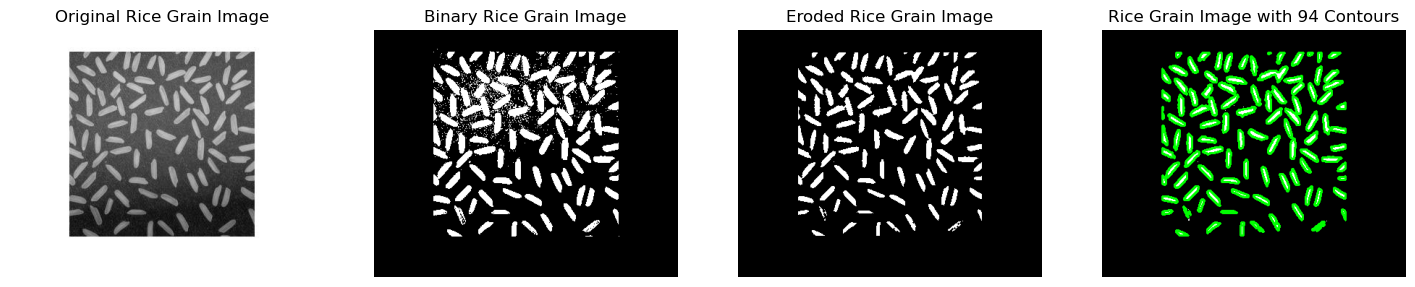

In [7]:
plt.figure(figsize=(18, 10))
plt.subplot(141)
plt.imshow(ricegrains, cmap='gray')
plt.title('Original Rice Grain Image')
plt.axis('off')

plt.subplot(142)
plt.imshow(binary_ricegrain, cmap='gray')
plt.title('Binary Rice Grain Image')
plt.axis('off')

plt.subplot(143)
plt.imshow(erosion_ricegrain, cmap='gray')
plt.title('Eroded Rice Grain Image')
plt.axis('off')

plt.subplot(144)
plt.imshow(image_ricegrains, cmap='gray')
plt.title(f'Rice Grain Image with {len(contours_ricegrain)} Contours')
plt.axis('off')

plt.show()

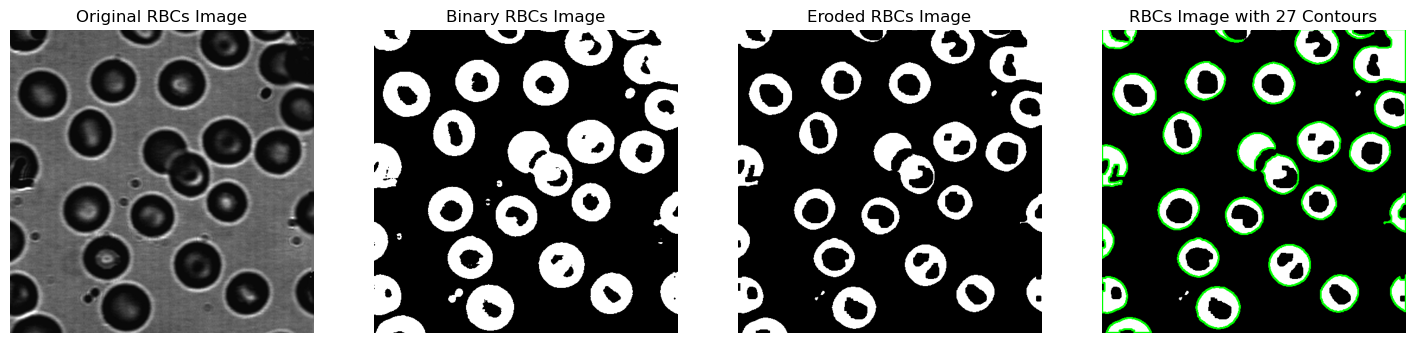

In [8]:
plt.figure(figsize=(18, 10))
plt.subplot(141)
plt.imshow(rbcs, cmap='gray')
plt.title('Original RBCs Image')
plt.axis('off')

plt.subplot(142)
plt.imshow(binary_rbcs, cmap='gray')
plt.title('Binary RBCs Image')
plt.axis('off')

plt.subplot(143)
plt.imshow(erosion_rbcs, cmap='gray')
plt.title('Eroded RBCs Image')
plt.axis('off')

plt.subplot(144)
plt.imshow(image_rbcs, cmap='gray')
plt.title(f'RBCs Image with {len(contours_rbcs)} Contours')
plt.axis('off')

plt.show()